In [ ]:
 !pip install tensorflow-io

In [ ]:
pip install librosa soundfile audioread

In [ ]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=394bc2e8f6c4692aa56685f9bee7d6a543736b2fd5afcb24a639663d38b7c246
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install librosa

In [ ]:
!pip install matplotlib
!pip install python3-tk
!pip install numpy
!pip install soundfile



ERROR: Could not find a version that satisfies the requirement python3-tk (from versions: none)
ERROR: No matching distribution found for python3-tk


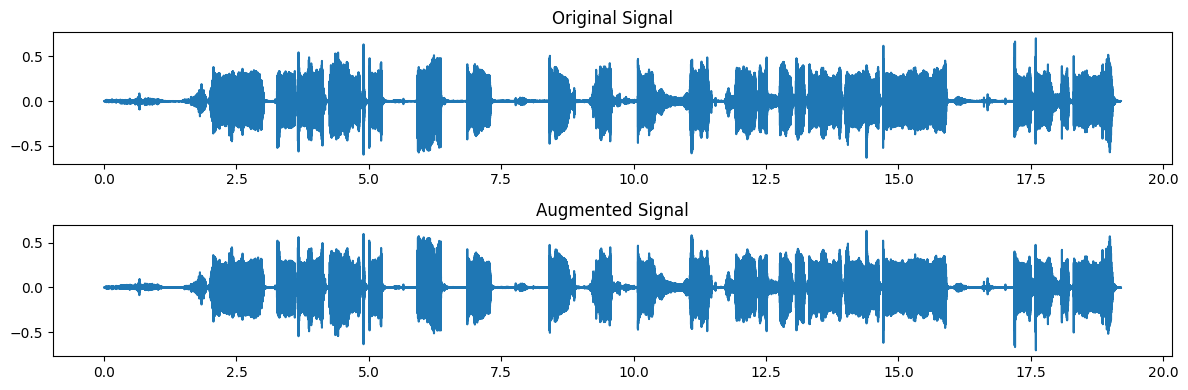

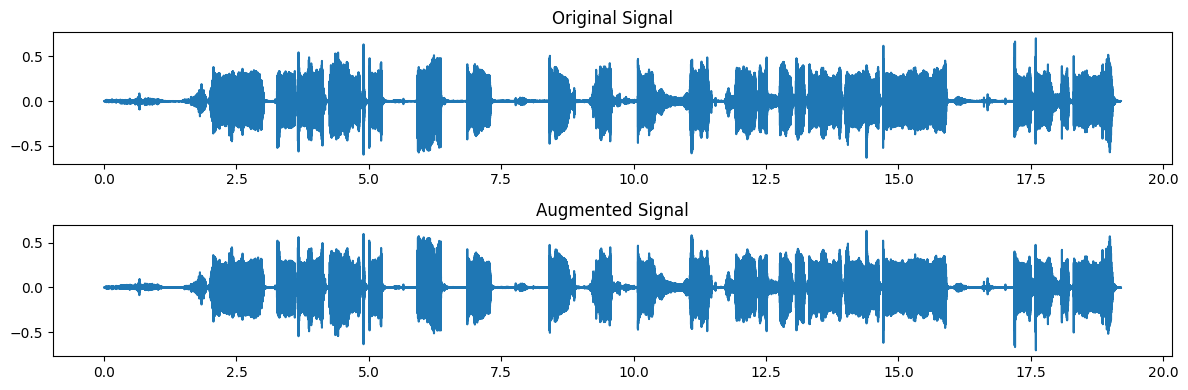

In [ ]:
import random
import librosa
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np

def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    time = np.arange(0, len(signal)) / sr

    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    plt.plot(time, signal)
    plt.title('Original Signal')

    plt.subplot(2, 1, 2)
    plt.plot(time, augmented_signal)
    plt.title('Augmented Signal')

    plt.tight_layout()
    plt.show()

# Python 3.8
# install matplotlib, librosa
# install python3-tk -> sudo apt install python3-tk

def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)

def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

def invert_polarity(signal):
    return signal * -1

if __name__ == "__main__":
    # Use double backslashes or raw string for file path
    # Double backslashes:
    # signal, sr = librosa.load("F:\\study\\SIH audio files\\mis articulated\\8 Oct, 2.07 pm(2)..mp3")

    # Raw string:
    signal, sr = librosa.load(r"/content/vaishanavi 8.mp3")

    augmented_signal = invert_polarity(signal)
    sf.write("augmented_audio.mp3", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)


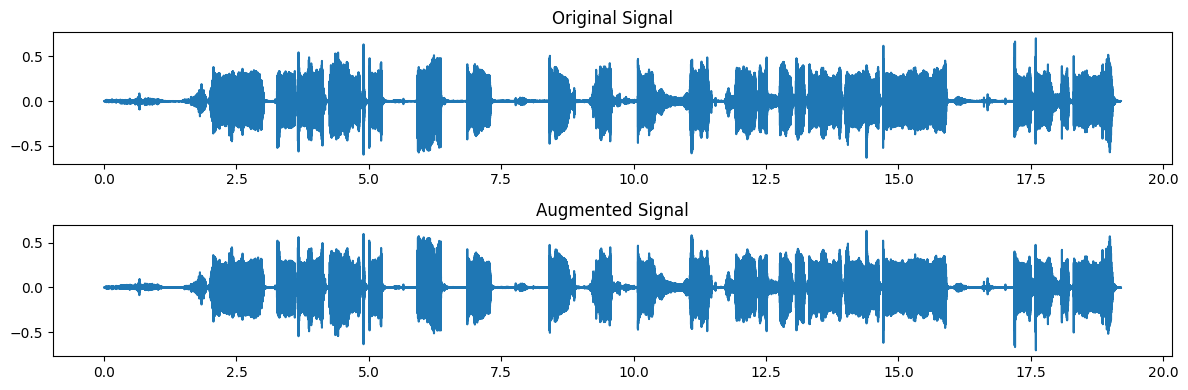

In [ ]:
import random
import librosa
import numpy as np
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np

def _plot_signal_and_augmented_signal(signal, augmented_signal, sr):
    time = np.arange(0, len(signal)) / sr

    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    plt.plot(time, signal)
    plt.title('Original Signal')

    plt.subplot(2, 1, 2)
    plt.plot(time, augmented_signal)
    plt.title('Augmented Signal')

    plt.tight_layout()
    plt.show()

# Python 3.8
# install matplotlib, librosa
# install python3-tk -> sudo apt install python3-tk

def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)

def pitch_scale(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

def invert_polarity(signal):
    return signal * -1

if __name__ == "__main__":
    # Use double backslashes or raw string for file path
    # Double backslashes:
    # signal, sr = librosa.load("F:\\study\\SIH audio files\\mis articulated\\8 Oct, 2.07 pm(2)..mp3")

    # Raw string:
    signal, sr = librosa.load(r"/content/vaishanavi 8.mp3")

    augmented_signal = invert_polarity(signal)
    sf.write("augmented_audio.mp3", augmented_signal, sr)
    _plot_signal_and_augmented_signal(signal, augmented_signal, sr)


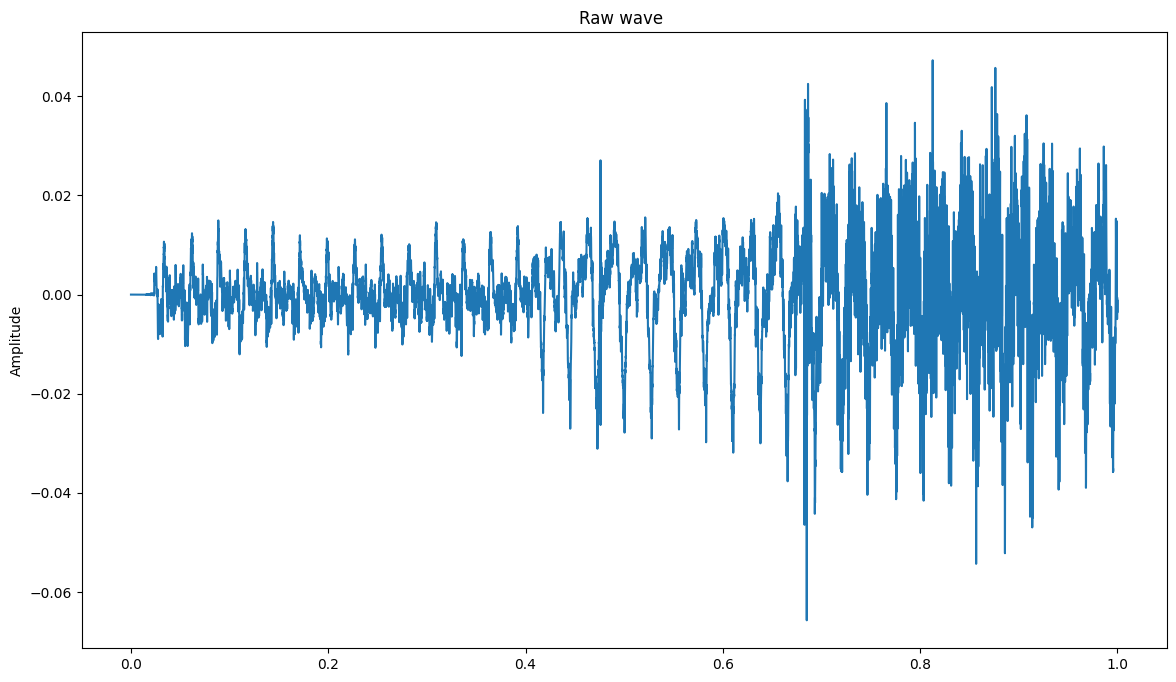

AttributeError: ignored

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

class AudioAugmentation:
    def read_audio_file(self, file_path):
        input_length = 16000
        data = librosa.core.load(file_path)[0]
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data

    def write_audio_file(self, file, data, sample_rate=16000):
        librosa.output.write_wav(file, data, sample_rate)

    def plot_time_series(self, data):
        fig = plt.figure(figsize=(14, 8))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()

    def stretch(self, data, rate=1):
        input_length = 16000
        data = librosa.effects.time_stretch(data, rate)
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data


# Create a new instance from AudioAugmentation class
aa = AudioAugmentation()

# Read and show cat sound
data = aa.read_audio_file(r"/content/vaishanavi 1.mp3")
aa.plot_time_series(data)

# Adding noise to sound
data_noise = aa.add_noise(data)
aa.plot_time_series(data_noise)

# Shifting the sound
data_roll = aa.shift(data)
aa.plot_time_series(data_roll)

# Stretching the sound
data_stretch = aa.stretch(data, 0.8)
aa.plot_time_series(data_stretch)

# Write generated cat sounds
aa.write_audio_file('output/generated_Augmentatio1.mp3', data_noise)
aa.write_audio_file('output/generated_Augmentatio2.mp3', data_roll)
aa.write_audio_file('output/generated_Augmentatio3.mp3', data_stretch)

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

class AudioAugmentation:
    def read_audio_file(self, file_path):
        input_length = 16000
        data = librosa.core.load(file_path)[0]
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data

    def write_audio_file(self, file, data, sample_rate=16000):
        librosa.output.write_wav(file, data, sample_rate)

    def plot_time_series(self, data):
        fig = plt.figure(figsize=(14, 8))
        plt.title('Raw wave ')
        plt.ylabel('Amplitude')
        plt.plot(np.linspace(0, 1, len(data)), data)
        plt.show()

    def add_noise(self, data):
        noise = np.random.randn(len(data))
        data_noise = data + 0.005 * noise
        return data_noise

    def shift(self, data):
        return np.roll(data, 1600)

    def stretch(self, data, rate=1):
        input_length = 16000
        data = librosa.effects.time_stretch(data, rate)
        if len(data) > input_length:
            data = data[:input_length]
        else:
            data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
        return data

# Create a new instance from AudioAugmentation class
aa = AudioAugmentation()

# Read and show cat sound
data = aa.read_audio_file(r"/content/vaishanavi 1.mp3")
aa.plot_time_series(data)

# Adding noise to sound
data_noise = aa.add_noise(data)
aa.plot_time_series(data_noise)

# Shifting the sound
data_roll = aa.shift(data)
aa.plot_time_series(data_roll)

# Stretching the sound
data_stretch = aa.stretch(data, 0.8)
aa.plot_time_series(data_stretch)

# Write generated cat sounds
aa.write_audio_file('output/generated_Augmentation1.mp3', data_noise)
aa.write_audio_file('output/generated_Augmentation2.mp3', data_roll)
aa.write_audio_file('output/generated_Augmentation3.mp3', data_stretch)


In [ ]:
pip install soundfile as sf

In [ ]:
pip install helper


In [ ]:
import random
import librosa
import numpy as np
import soundfile as sf

def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

def time_stretch(signal, time_stretch_rate):
    return librosa.effects.time_stretch(signal, time_stretch_rate)

def pitch_scale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal

def invert_polarity(signal):
    return signal * -1

if __name__ == "__main__":
    # Use double backslashes or raw string for file path
    # Double backslashes:
    # signal, sr = librosa.load("F:\\study\\SIH audio files\\mis articulated\\8 Oct, 2.07 pm(2)..mp3")

    # Raw string:
    signal, sr = librosa.load(r"/content/blues.00000.wav")

    # Example: Apply invert_polarity
    augmented_signal = invert_polarity(signal)
    # augmented_noise_audio
     # Apply and save each augmentation technique
    augmented_signal = add_white_noise(signal, 0.005)
    sf.write("augmented_audio_white_noise.wav", augmented_signal, sr)

    # Save the augmented signal as an audio file
    sf.write("augmented_audio.wav", augmented_signal, sr)
